In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from utils import functions_3D as F3D
import matplotlib.pyplot as plt
plt.style.use(r'utils/mplstyle')

from matplotlib import gridspec
import quaternion

# generate a 2-sphere for plotting

THETA = np.linspace(1e-4, np.pi - 1e-4, 200)
PHI = np.linspace(0, np.pi * 2, 200)

THETA, PHI = np.meshgrid(THETA, PHI)

X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

In [2]:
# nice colours to use

colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colorsYellow = ['#fb9d32', '#fec787']
colorsPurple = ['#d69bc5' ,'#a8509f']
colorsGreyOrange = ['#c3c3c3', '#f8a834']
colors = [colorsBlue, colorsRed, colorsYellow, colorsPurple, colorsGreyOrange]

In [3]:
# generate a perfect ball
maxL = 3
As = np.random.normal(0, 1, (maxL + 1) ** 2 - 1 - 3) * 0
Ps = np.random.random(len(As)) * 0
ball = F3D.ball(maxL, As, Ps)

# render the ball info
ball.make_ball(grid_point = 200, keep = True);

In [4]:
# we pick one contact point and spin the ball on the spot, then simulate from where
spins = np.linspace(0, 2 * np.pi, 30)

theta_ini = 1
phi_ini = 2

Q_RES = []

alpha = 0.15
f = np.sin(alpha)
g = np.cos(alpha)
# the period is 
for i in range(len(spins)):    
    ball.initialisation_simple(THETA_CT = theta_ini, PHI_CT = phi_ini, spin = spins[i])
    ball.simulate(f = f, g = g, ti = 0, tf = 2 * np.pi / np.sin(alpha), outputN = 1000)
    _qful = ball.s[:-1, 2:6]
    _qful *= np.sign(_qful)[:, 0][:, np.newaxis] # pull all q to have a positive scalar part
    Q_RES.append(_qful)

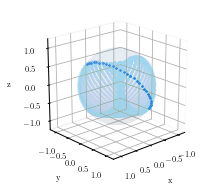

In [5]:
fig = plt.figure(figsize = (5, 3))

ax1 = fig.add_subplot(1,1,1, projection='3d')
ax1.set_box_aspect((1,1,1))

azim = 48
elev = 20
ax1.view_init(elev=elev, azim=azim)

# for i in range(2):
#     ax1.scatter(Q_RES[i,:,1], Q_RES[i,:,2], Q_RES[i,:,3], s = 20)

# for i in range(2):
#     _qful = np.vstack(Q_FUL[i])
#     ax1.plot(_qful[:, 1], _qful[:, 2], _qful[:, 3], color = 'black')

for i in range(len(spins)):
    _orb = Q_RES[i]
    ax1.scatter(_orb[:, 1], _orb[:, 2], _orb[:, 3], color = colors[0][0], s = 3, alpha = 0.01)
    ax1.scatter(_orb[0, 1], _orb[0, 2], _orb[0, 3], color = colors[0][1], s = 3, alpha = 1)

ax1.plot_surface(X, Y, Z, alpha = 0.05, zorder = -100)

ax1.set_xlim(-1.2, 1.2)
ax1.set_ylim(-1.2, 1.2)
ax1.set_zlim(-1.2, 1.2)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# plt.axis('off')
plt.savefig('3DPlots/tube.png', transparent = True, dpi = 300)